## Matplotlib

# contour
On désire tracer les isovaleurs d'une fonction à 2 variables en 3D et dans le plan projeté (x,y)

C:\Users\toussaij\AppData\Local\Temp\ipykernel_12744\3398367430.py:27: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(cset, shrink=1, aspect=10)


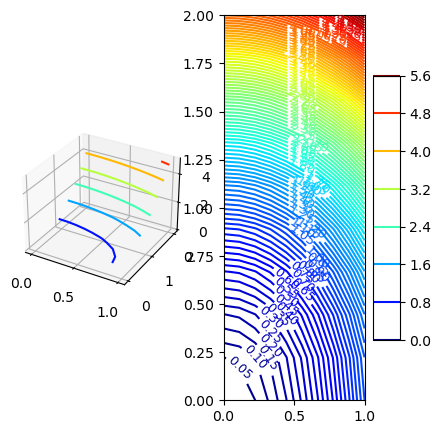

In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Nx=10
x=np.linspace(0, 1, Nx)

Ny=10
y=np.linspace(0, 2, Ny)

X, Y = np.meshgrid(x, y)
Z=X*X+Y*Y

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(121, projection='3d')
#ax  = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

cset  = ax.contour(X, Y, Z, cmap=cm.jet)
cset2 = ax2.contour(X, Y, Z, cmap=cm.jet, levels=100) # cmap=cm.coolwarm

ax.clabel(cset, fontsize=9, inline=1)
ax2.clabel(cset2, fontsize=9, inline=1)

ax.grid()
fig.colorbar(cset, shrink=1, aspect=10)
plt.show()

In [ ]:
help(ax.contour)

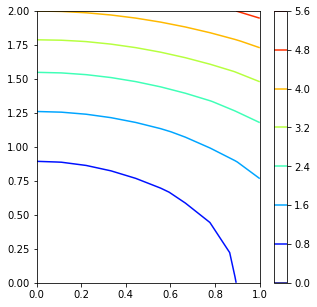

In [4]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

Nx=10
x=np.linspace(0, 1, Nx)

Ny=10
y=np.linspace(0, 2, Ny)

X, Y = np.meshgrid(x, y)
Z=X*X+Y*Y

fig = plt.figure(figsize=(5, 5))
#ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

#cset = ax.contour(X, Y, Z, cmap=cm.coolwarm)
cset = plt.contour(X, Y, Z, cmap=cm.jet)
#plt.clabel(cset, fontsize=9, inline=1)
plt.colorbar()
plt.show()

# surface 3D
La librairie Matplotlib reste essentiellement une librairie 2D
et ne comporte donc pas un moteur 3D comme dans Matlab.
Gérer les éclairages n'est pas immédiat.

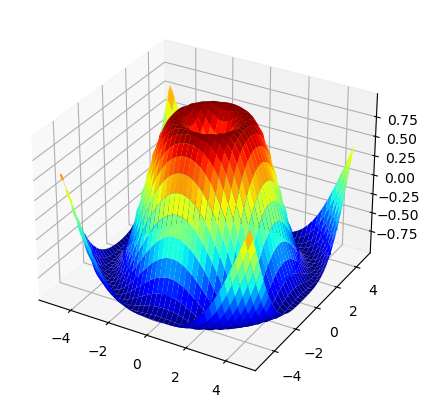

In [2]:
#%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

cset = plt.contour(X, Y, Z, cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  cmap=cm.jet, linewidth=0)
ax.grid(True)
plt.clabel(cset, fontsize=9, inline=1)
#plt.colorbar()
plt.show()

